## IBM 직원 퇴사 데이터 분석

### Business Understanding (비즈니스이해)

#### **문제**

* 직원 퇴사율 증가

#### **가설**

* 나이와 퇴사는 관련이 있다.
* 출장 빈도외 퇴사는 관련이 있다.
* 월급과 퇴사는 관련이 있다.
* 급여 인상률과 퇴사는 관련이 있다.
* 스톡 옵션과 퇴사는 관련이 있다.
* 집에서부터 회사까지의 거리와 퇴사는 관련이 있다.
* 업무 환경 만족도/직무 만족도/동료와의 관계 만족도와 퇴사는 관련이 있다.
* 야근 여부와 퇴사는 관련이 있다.
* 워라벨과 퇴사는 관련이 있다.
* 결혼 상태와 퇴사는 관련이 있다.

### Data Understanding (데이터 이해)

#### **변수 설명**
* Y : Attrition (퇴사 여부 -> 'Yes', 'No')
* X
    * Age (나이)
    * BusinessTravel (출장 빈도)
    * DailyRate (일일 급여)
    * Department (부서)
    * DistanceFromHome (집에서부터 회사까지의 거리)
    * Education (학력 -> 1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor)
    * EducationField (전공)
    * EmployeeCount (직원 수 -> 전부 1)
    * EmployeeNumber (직원 고유 번호)
    * EnvironmentSatisfaction (업무 환경 만족도 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * Gender (성별)
    * HourlyRate (시급)
    * JobInvolvement (직무 참여도 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * JobLevel (직급)
    * JobRole (직무)
    * JobSatisfaction (직무 만족도 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * MaritalStatus (결혼 여부)
    * MonthlyIncome (월 소득)
    * MonthlyRate (월급)
    * NumCompaniesWorked (근무한 회사 수)
    * Over18 (18세 이상 여부 -> 전부 Y)
    * OverTime (야근)
    * PercentSalaryHike (급여 인상률)
    * PerformanceRating (성과 등급 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * RelationshipSatisfaction (동료와의 관계 만족도 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * StandardHours (근무 시간 -> 전부 80)
    * StockOptionLevel (스톡 옵션)
    * TotalWorkingYears (경력 기간)
    * TrainingTimesLastYear (지난해 받은 교육 시간)
    * WorkLifeBalance (워라벨 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * YearsAtCompany (근속 연수)
    * YearsInCurrentRole (현재 직무 경력 기간)
    * YearsSinceLastPromotion (마지막 승진 이후 경과된 시간)
    * YearsWithCurrManager (현재 관리자와 함께 일한 기간)

In [2]:
# 라이브러리 로딩
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

import scipy.stats as spst

In [3]:
# 데이터 로딩
data = pd.read_csv('./employee_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# 데이터 요약 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### **데이터프레임 구조 만들기**

##### **컬럼 삭제**

모든 직원이 동일한 값을 가지고 있는 'EmployeeCount', 'Over18', 'StandardHours'는 고려하지 않겠다.

In [5]:
data2 = data.copy()

data2.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)
data2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


##### **컬럼 이름 변경**

In [6]:
# data2.columns = [] / data2.rename(columns = {})
data2.rename(columns={'DistanceFromHome': 'Distance', 'EmployeeNumber': 'EmployeeNo', 'EnvironmentSatisfaction': 'E_Sat', 'JobSatisfaction': 'J_Sat', 'RelationshipSatisfaction': 'R_Sat'}, inplace=True)
data2

,Age,Attrition,BusinessTravel,DailyRate,Department,Distance,Education,EducationField,EmployeeNo,E_Sat,...,PerformanceRating,R_Sat,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


##### **값 변경하기**

In [7]:
# np.where() : Attrition의 값이 'Yes'일 경우 1, 'No'일 경우 0으로 바꾸기
data2['Attrition'] = np.where(data2['Attrition'] == 'Yes', 1, 0)

# map() : OverTime 값이 'Yes'일 경우 1, 'No'일 경우 0으로 바꾸기
data2['OverTime'] = data2['OverTime'].map({'Yes': 1, 'No': 0})

data2

,Age,Attrition,BusinessTravel,DailyRate,Department,Distance,Education,EducationField,EmployeeNo,E_Sat,...,PerformanceRating,R_Sat,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


#### **단변량 분석**

In [30]:
# 수치형 변수 함수
def eda_1_num(x, data, bins = 30):
    # 기초 통계량
    display(data[[x]].describe().T)
    
    # 시각화
    plt.figure(figsize = (6, 6))
    
    plt.subplot(2, 1, 1)
    sns.histplot(x = x, data = data, bins = bins, kde = True)
    plt.grid()
    
    plt.subplot(2, 1, 2)
    sns.boxplot(x = x, data = data)
    plt.grid()
    
    plt.show()

In [71]:
# 범주형 변수 함수
def eda_1_cat(x, data, rotation = 0):
    # 기초 통계량
    display(data[x].value_counts())
    display(data[x].value_counts(normalize = True))
    
    # 시각화
    sns.countplot(x = x, data = data)
    plt.xticks(rotation = rotation)
    plt.grid()
    plt.show()

##### **Attrition**

Attrition
0    1233
1     237
Name: count, dtype: int64

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

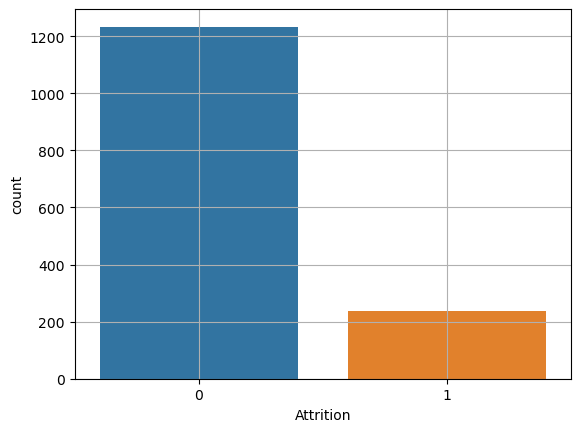

In [72]:
eda_1_cat('Attrition', data2)

* 전체 직원의 16% 정도가 퇴사하였다.

##### **OverTime**

OverTime
0    1054
1     416
Name: count, dtype: int64

OverTime
0    0.717007
1    0.282993
Name: proportion, dtype: float64

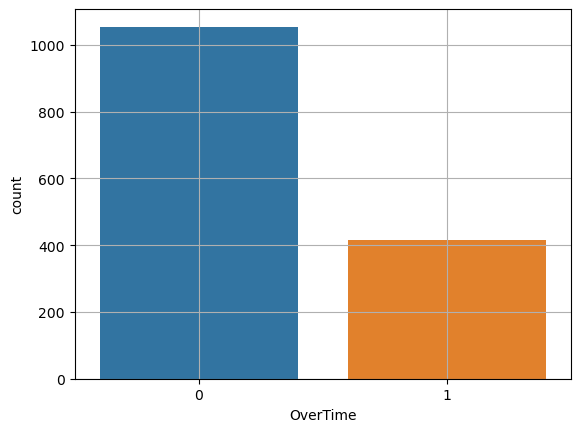

In [73]:
eda_1_cat('OverTime', data2)

* 전체 직원의 28%가 야근을 하는 것으로 나타났다. 
* 퇴사 비율보다 야근 비율이 높은 것으로 나타났다.

##### **Gender**

Gender
Male      882
Female    588
Name: count, dtype: int64

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

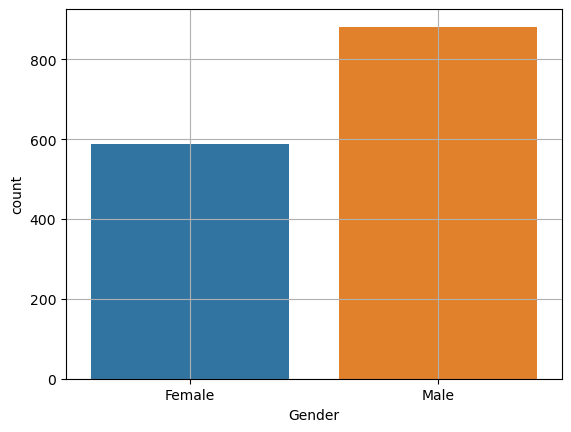

In [74]:
eda_1_cat('Gender', data2)

* 전체 직원의 40%가 여자, 60%가 남자이다.

##### **EducationField**

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

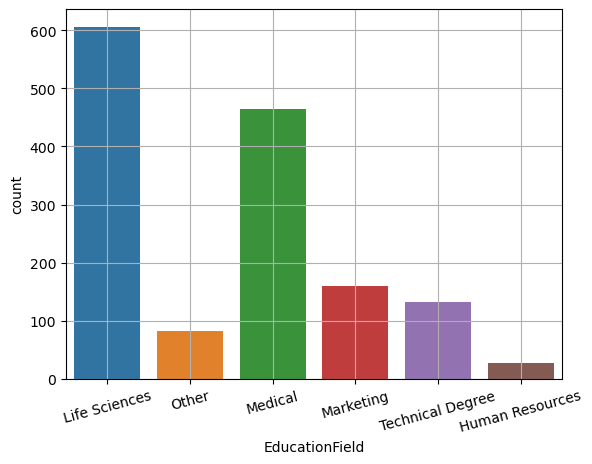

In [76]:
eda_1_cat('EducationField', data2, 15)

* Life Sciences 전공이 전체 직원의 40%, Medical 전공이 전체 직원의 30%로 가장 많은 비율을 차지한다.

##### **Department**

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64

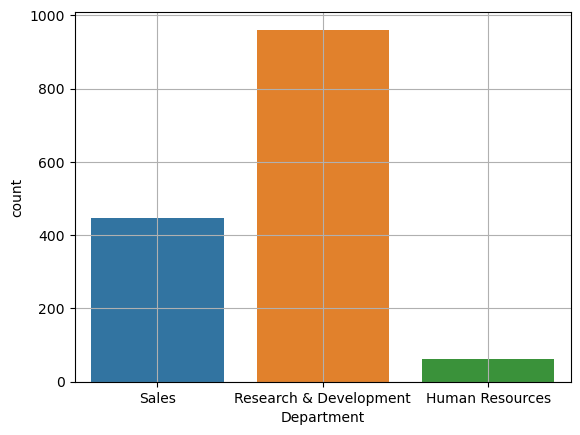

In [77]:
eda_1_cat('Department', data2)

* Research & Development Department가 65%로 가장 많은 비율을 차지하며, Human Resources는 4%로 가장 적은 비율을 차지한다.

##### **MaritalStatus**

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

MaritalStatus
Married     0.457823
Single      0.319728
Divorced    0.222449
Name: proportion, dtype: float64

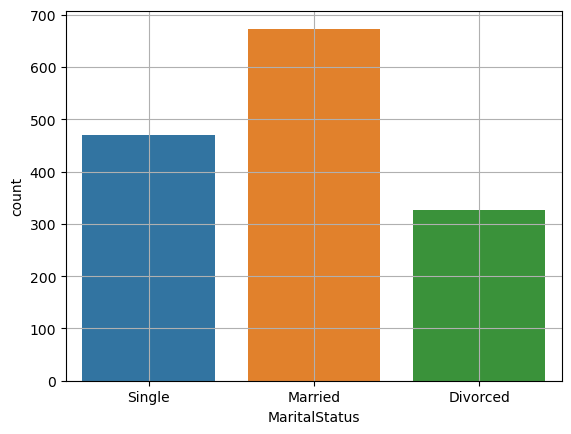

In [82]:
eda_1_cat('MaritalStatus', data2)

* Married > Single > Divorced

##### **BusinessTravel**

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64

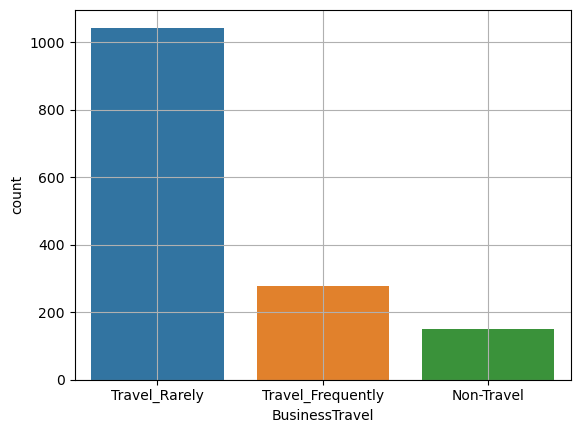

In [78]:
eda_1_cat('BusinessTravel', data2)

* 70%의 대부분 직원들이 가끔 출장을 나가며, 출장을 전혀 가지 않는 직원은 전체의 10%이다.

##### **Age**

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0


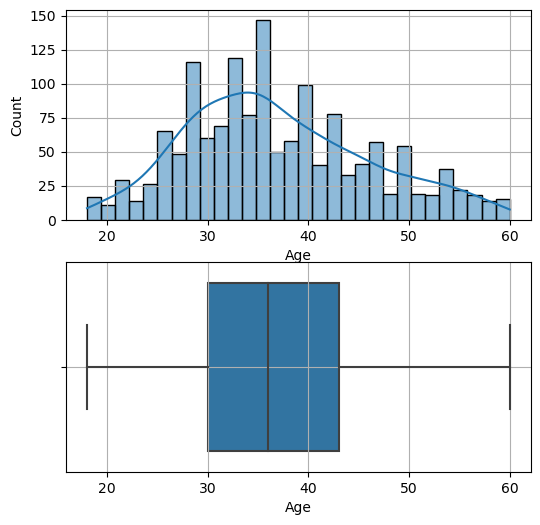

In [31]:
eda_1_num('Age', data2)

* 최솟값 : 18, 최댓값 : 60, 평균 나이 : 37세, 중앙값 : 36

##### **MonthlyIncome**

,count,mean,std,min,25%,50%,75%,max
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0


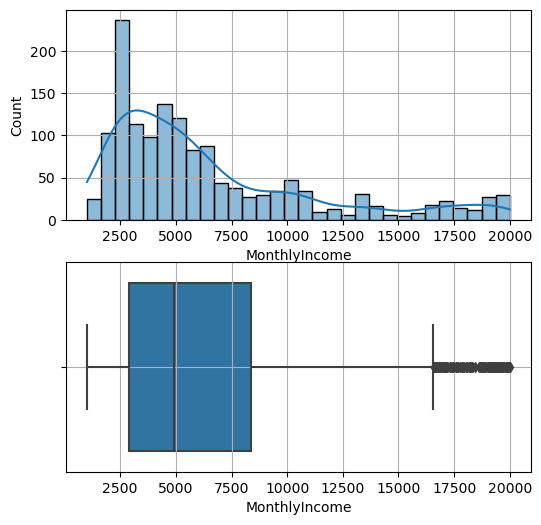

In [32]:
eda_1_num('MonthlyIncome', data2)

* 75%의 직원이 8500 달러 이하의 월 소득이 있다.
* 15000 달러를 넘어가는 이상치들을 많이 발견할 수 있다.
* 평균 소득은 6502, 중앙값은 4919로 평균보다 높은 값들이 평균을 높인다는 것을 알 수 있다.

##### **DistanceFromHome**

,count,mean,std,min,25%,50%,75%,max
Distance,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0


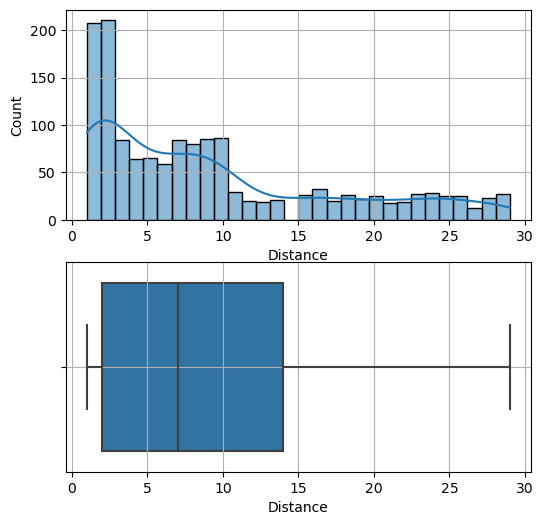

In [83]:
eda_1_num('Distance', data2)

* 75%의 직원이 14마일 이하의 거리에 거주하고 있다.

##### **PercentSalaryHike**

,count,mean,std,min,25%,50%,75%,max
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0


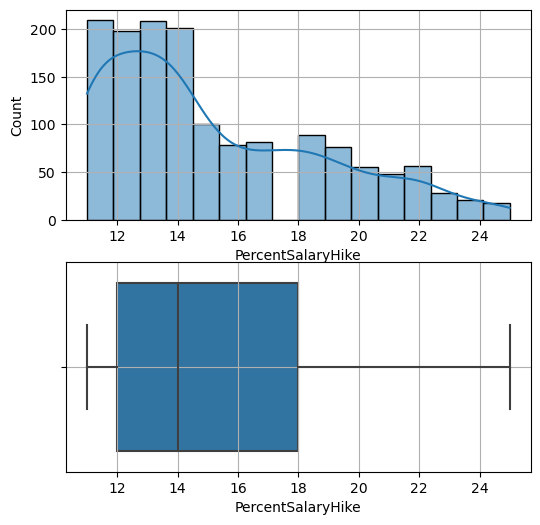

In [86]:
eda_1_num('PercentSalaryHike', data2, 16)

* 75%의 직원이 18% 이하의 인상율을 달성했다.

In [93]:
# 데이터 로딩
attrition = pd.read_csv('./employee_attrition.csv').head(10)
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


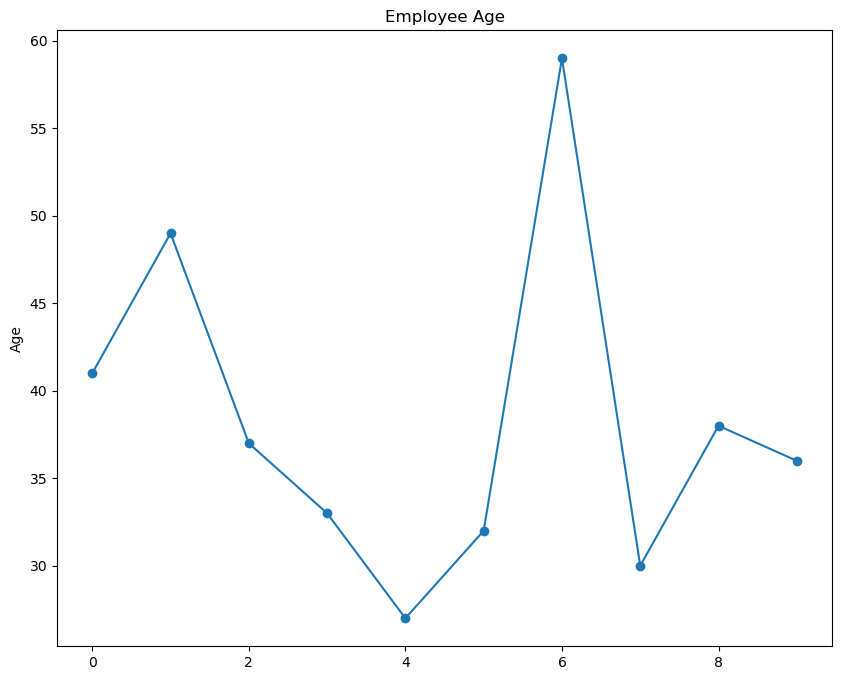

In [96]:
# 그래프 크기 조정
plt.figure(figsize = (10, 8))

# plt.plot(x, y, data = 데이터프레임, color='', linestyle='', marker='')
plt.plot('Age', data = attrition, marker='o')

plt.title('Employee Age')  # 그래프 이름
plt.ylabel('Age')  # y축 이름

plt.show()

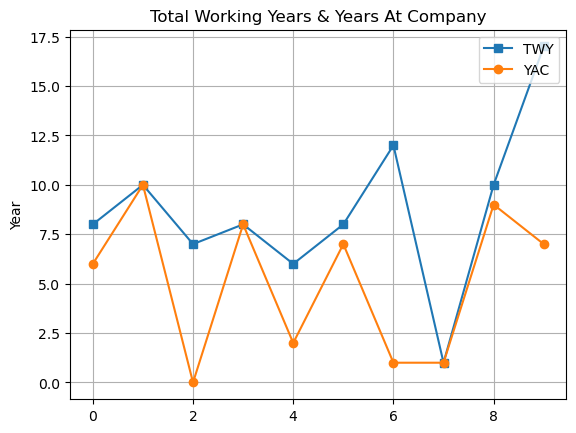

In [100]:
plt.plot('TotalWorkingYears', data = attrition, marker='s', label = 'TWY')
plt.plot('YearsAtCompany', data = attrition, marker='o', label = 'YAC')

plt.title('Total Working Years & Years At Company')
plt.ylabel('Year')
plt.legend(loc = 'upper right')  # 범례 추가
plt.grid()  # 그리드 추가 

plt.show()

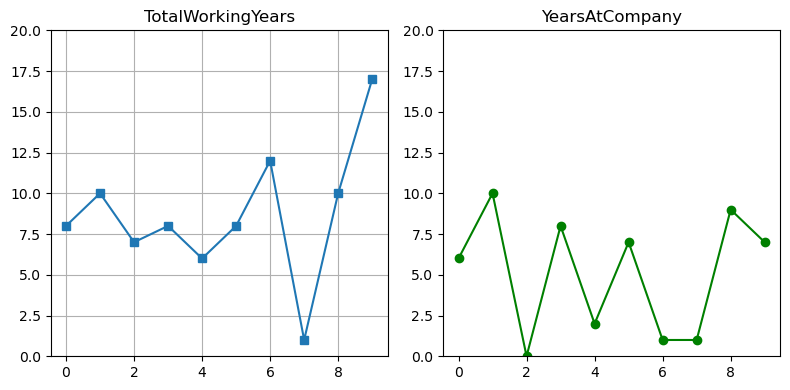

In [110]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot('TotalWorkingYears', data = attrition, marker='s')
plt.title('TotalWorkingYears')
plt.ylim(0, 20)  # y축 범위 설정
plt.grid()

plt.subplot(1, 2, 2)
plt.plot('YearsAtCompany', data = attrition, color='g', marker='o')
plt.title('YearsAtCompany')
plt.ylim(0, 20)

plt.tight_layout()  # 레이아웃 조정
plt.show()

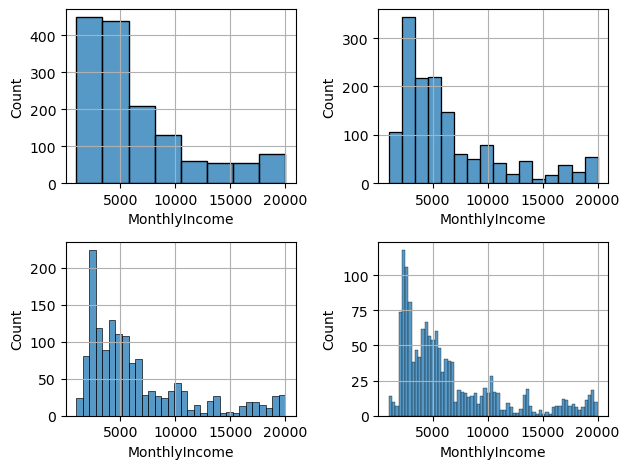

In [116]:
plt.subplot(2, 2, 1)
sns.histplot(x = 'MonthlyIncome', data = data, bins = 8)
plt.grid()

plt.subplot(2, 2, 2)
sns.histplot(x = 'MonthlyIncome', data = data, bins = 16)
plt.grid()

plt.subplot(2, 2, 3)
sns.histplot(x = 'MonthlyIncome', data = data, bins = 32)
plt.grid()

plt.subplot(2, 2, 4)
sns.histplot(x = 'MonthlyIncome', data = data, bins = 64)
plt.grid()

plt.tight_layout()
plt.show()

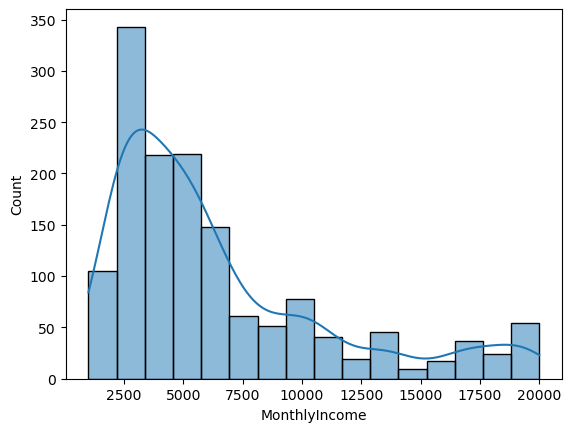

In [117]:
sns.histplot(x = 'MonthlyIncome', data = data, bins = 16, kde = True)
plt.show()

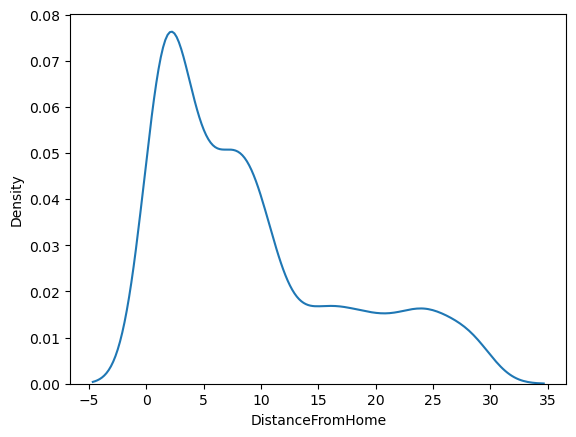

In [120]:
sns.kdeplot(x = 'DistanceFromHome', data = data)
plt.show()

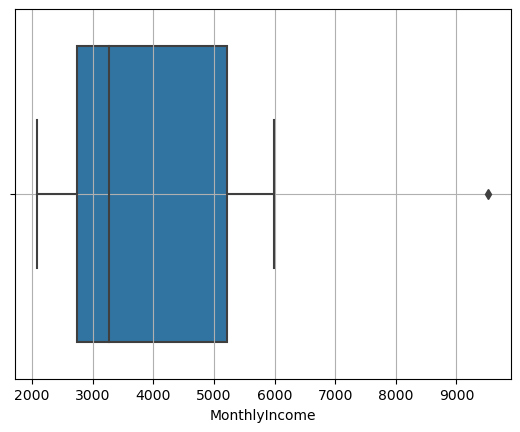

In [121]:
sns.boxplot(x = 'MonthlyIncome', data = attrition)
plt.grid()
plt.show()

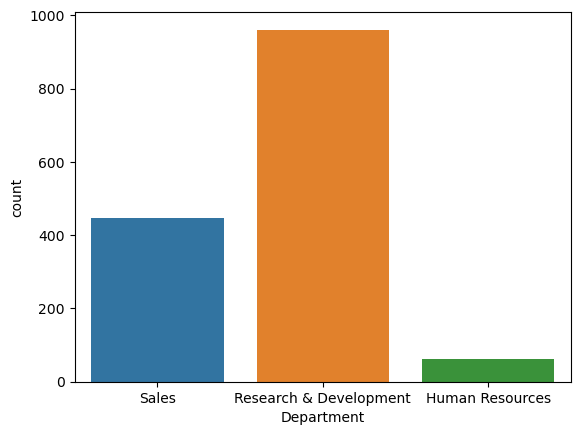

In [122]:
sns.countplot(x = 'Department', data = data)
plt.show()